#### Чтение plasma из Астры

In [11]:
import io
import numpy as np
import pandas as pd
plasma = {}
with open('plasma3.dat') as file:
    chunks = {}
    for l in file.readlines():
        if l.startswith('#'):
            output = io.StringIO()
            chunks[l[1:-1]] = output
        else:
            output.write(l)

    for key, o in chunks.items():     
        o.seek(0)
        df = pd.read_csv(o,  delim_whitespace=True)
        o.close()
        plasma[key] = df




In [12]:
rdata = plasma['radial_data']
approx = plasma['approx']
from Field import Field
field = Field(plasma)

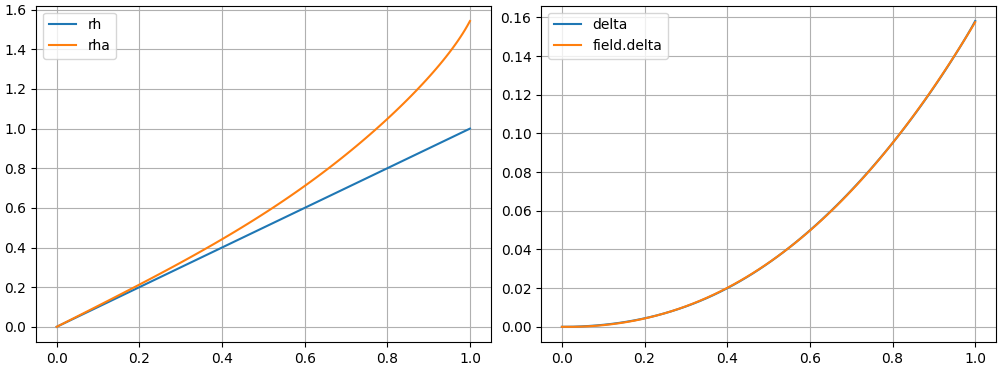

In [13]:
%matplotlib widget

from matplotlib import pyplot as plt
rh = rdata['rh']
# plot
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 3.7), layout='constrained')
ax1.plot(rh, rh,  label='rh')
ax1.plot(rh, rdata['rha'],  label='rha')
#ax.set_title(r'$\sigma_i=15$')

ax2.plot(rdata['rh'], rdata['delta'],  label='delta')
ax2.plot(rh, field.delta.val(rh),  label='field.delta')


ax1.legend()
ax1.grid(True)
ax2.legend()
ax2.grid(True)

#fig.show()

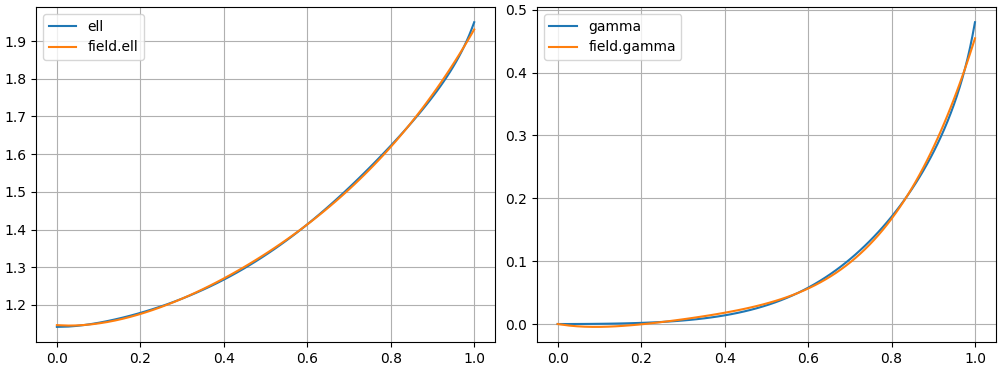

In [14]:
%matplotlib widget

from matplotlib import pyplot as plt

# plot
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 3.7), layout='constrained')

ax1.plot(rh, rdata['ell'],  label='ell')
ax1.plot(rh, field.ell.val(rh),  label='field.ell')


ax2.plot(rh, rdata['gamm'],  label='gamma')
ax2.plot(rh, field.gamma.val(rh),  label='field.gamma')

ax1.legend()
ax1.grid(True)
ax2.legend()
ax2.grid(True)

    xdl=fdf(xr,cdl,ncoef,xdlp) - delta -  shift as a function of "minor radius":
    
    xly=fdf(xr,cly,ncoef,xlyp) - ell - ellipticity as a function of "minor radius":
    xgm=fdf(xr,cgm,ncoef,xgmp) - gamm - triangularity as a function of "minor radius":
    xmy=fdf(pa,cmy,ncoef,xmyp) - Polinomial approximation of the amy(r) 
                               -  amy=(btor/q)*rho*(drho/dr) is a function of "minor radius" r=rh(i).

In [15]:
index = 78
delta = rdata['delta'][index]
ell = rdata['ell'][index]
gamma = rdata['gamm'][index]
print(delta, ell, gamma)

theta = np.linspace(0, 2*np.pi, 100)
x, z = field.mag_surf2(1, theta, delta, ell, gamma)


0.158136288123822 1.95000000000064 0.48


In [16]:
theta = np.linspace(0, 2*np.pi, 100)
xa, za = field.mag_surf(1.0, theta)

(0.12969828621214313, 0.6204353849581362, -0.47827479086104, 0.47827479086104)

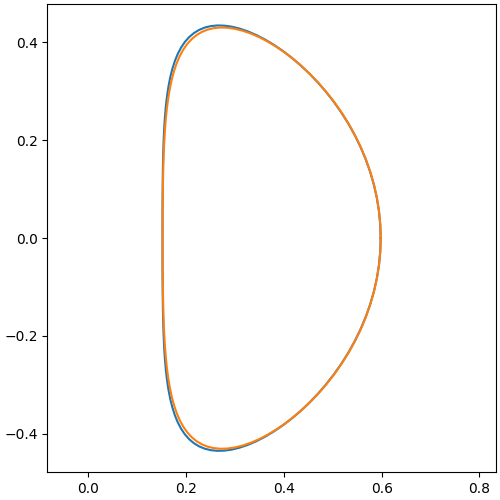

In [17]:
from matplotlib import pyplot as plt
 
# Function to plot
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
ax.plot(x, z)
ax.plot(xa, za)
ax.axis('equal')
#fig.show()

In [18]:
from Field import Field
field = Field(plasma)

r = np.linspace(0.01, 1.0, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
Bt, Bp, Si = field.value(R,P)
X, Y = field.mag_surf(R,P)

In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Equation of ring cyclide
# see https://en.wikipedia.org/wiki/Dupin_cyclide
import numpy as np

fig = make_subplots(rows=1, cols=2,
                    specs=[[{'is_3d': True}, {'is_3d': True}]],
                    subplot_titles=['Bp', 'Sin B'],
                    )

scene1=dict(aspectratio=dict(x=1, y=2, z=0.5),
                camera_eye=dict(x=-1.57, y=1.36, z=0.58))

fig.add_trace(go.Surface(x=X, y=Y, z=Bp, colorbar_x=-0.07), 1, 1)
fig.add_trace(go.Surface(x=X, y=Y, z=Si), 1, 2)
fig.update_scenes( 
                aspectratio=dict(x=1, y=2, z=0.6),
                camera_eye=dict(x=-2.57, y=1.36, z=0.58), row=1, col=1)

fig.update_scenes( 
                aspectratio=dict(x=1, y=2, z=0.4),
                camera_eye=dict(x=-2.57, y=1.36, z=0.58), row=1, col=2)
fig.update_layout( title_text="Tor",
      autosize=False,
      width=1100,
      height=600,
  
)
fig.show()

In [20]:
def tri_indices(simplices):
    #simplices is a numpy array defining the simplices of the triangularization
    #returns the lists of indices i, j, k

    return ([triplet[c] for triplet in simplices] for c in range(3))

import numpy as np
from scipy.spatial import Delaunay

def create_tor_mesh(r= 1, cmin=0, cmax=1):
    theta = np.linspace(0, 2*np.pi, 30)
    phi   = np.linspace(0, 1.5*np.pi, 20)

    u,v = np.meshgrid(theta,phi)
    u = u.flatten()
    v = v.flatten()

    Bt, Bp, Si = field.value(r,u)
    x, y, z, = field.mag_surf3D(r, u, v)

    points2D = np.vstack([u,v]).T
    tri = Delaunay(points2D)
    I, J, K = tri_indices(tri.simplices)

    return go.Mesh3d( alphahull= 1,
                    x=x, y=y, z=z,
                    i=I, j=J, k=K,  
                    cmin= cmin, cmax= cmax,
                    intensity = Si, 
                    intensitymode='vertex',
                    flatshading= False,

                    opacity=1.00)

In [21]:
def create_test_line(r):
    theta = np.linspace(0, 2*np.pi, 50)
    phi   = np.linspace(0, 2*np.pi, 50)
    x, y, z, = field.mag_surf3D(r, theta, phi)
    return go.Scatter3d(
    x=x, y=y, z=z,
    mode= 'lines',
    line=dict(
        color='darkblue',
        width=5
    ))

def mag_line2D(r,n):
      #theta = np.linspace(0, 2*np.pi, 50)
    phi_l   = np.linspace(0, n*np.pi, n*50)
    phi = 0.0
    theta = 0.0
    d_phi = 2*np.pi/50
    theta_l = []
    for phi in phi_l:
        Bt, Bp, Si = field.value(r, theta)
        d_theta = Si * d_phi
        theta = theta + d_theta
        theta_l.append(theta)
    return np.array(theta_l), phi_l


def create_mag_line(r, n):
    theta, phi = mag_line2D(r,n)
    x, y, z, = field.mag_surf3D(r, theta, phi)
    
    return go.Scatter3d(
        x=x, y=y, z=z,
        opacity=0.2,
        mode= 'lines',
        line=dict(
            color='darkblue',
            width=5
        ))


In [22]:
import plotly.express as px
theta, phi = mag_line2D(1,248)
fig = px.line(x= np.sin(theta), y=np.sin(phi), title="sample figure")

fig.show()

In [23]:
tor1 = create_tor_mesh(r= 1.0, cmin= 0, cmax= 0.2)
tor2 = create_tor_mesh(r= 0.75, cmin= 0, cmax= 0.2)
tor3 = create_tor_mesh(r= 0.5, cmin= 0, cmax= 0.2)
tor4 = create_tor_mesh(r= 0.25, cmin= 0, cmax= 0.2)
tor5 = create_tor_mesh(r= 0.05, cmin= 0, cmax= 0.2)
#line1 = create_test_line(1.0)
#line1 = create_mag_line(.5, 10)
line2 = create_mag_line(0.25, 1*248) 

fig = go.Figure(data=[line2, tor1, tor2, tor3, tor4, tor5])

fig.update_layout( title_text="Tor",
      autosize=False,
      width=1000,
      height=700,
  
)
fig.show()